In [1]:
# %pip install -U scikit-learn
# %pip install pandas
# %pip install joblib

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from joblib import load, dump

import pandas as pd


dataset = pd.read_csv("passwords.csv")

# X = pd.DataFrame(dataset.data)
# y = pd.DataFrame(dataset.target)

In [4]:
for i in range(7):
  dataset = dataset.drop((len(dataset) -1) )

In [5]:
def floatTransform( data ):
  result=[]
  for i in data:
    result.append(ord(i))

  return result

def countNumbers( data ):
  result = 0
  for i in data:
    if i.isdigit():
      result += 1
  return result

def countEspecialCharacters( data ):
  result = 0
  for i in data:
    if i.isalpha():
      continue
    elif i.isdigit():
      continue
    result += 1

  return result

In [6]:
X = dataset[['strength']]

X['length'] = dataset['password'].apply( len )
X['numbers_count'] = dataset['password'].apply( countNumbers )
X['especial_characters_count'] = dataset['password'].apply( countEspecialCharacters )

# X['category'] = X['category'].apply(floatTransform)

y = dataset[['time_unit']]

C:\Users\disrct\AppData\Local\Temp\ipykernel_11600\4238435894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['length'] = dataset['password'].apply( len )
C:\Users\disrct\AppData\Local\Temp\ipykernel_11600\4238435894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['numbers_count'] = dataset['password'].apply( countNumbers )
C:\Users\disrct\AppData\Local\Temp\ipykernel_11600\4238435894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=350
)

In [8]:
y_train

,time_unit
163,hours
27,days
291,days
19,seconds
261,minutes
...,...
296,months
170,days
470,months
126,months


In [9]:
model = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=10
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=10)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

0.97

array([[48,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0],
       [ 0,  2, 10,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 11]], dtype=int64)

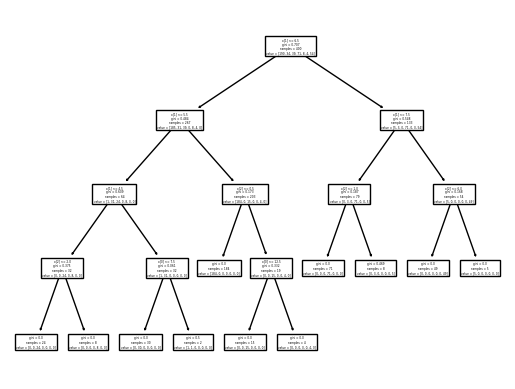

In [12]:
plot_tree(model)
confusion_matrix(y_test, y_pred)

In [13]:
X

,strength,length,numbers_count,especial_characters_count
0,8.0,8,0,0
1,4.0,6,6,0
2,4.0,8,8,0
3,4.0,4,4,0
4,8.0,6,0,0
...,...,...,...,...
495,6.0,6,0,0
496,9.0,8,0,0
497,7.0,7,0,0
498,7.0,6,0,0


In [14]:
# Verificando se deu boa
dic = {
    "strength" : 10,
    "length" : 9,
    "numbers_count" : 5,
    "especial_characters_count" : 4
}
newdata = pd.Series(dic)


pred = model.predict([newdata])
print(pred)

['years']


c:\Users\disrct\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
